In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [33]:
df=pd.read_csv(".\Microsoft.csv")

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5000 non-null   object 
 1   open    5000 non-null   float64
 2   high    5000 non-null   float64
 3   low     5000 non-null   float64
 4   close   5000 non-null   float64
 5   volume  5000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 234.5+ KB
None


In [35]:
print(df.head())

         date      open      high       low     close     volume
0  2001-03-16  26.25000  27.56250  26.24219  27.28125  112848800
1  2001-03-19  27.25000  27.75000  26.56250  27.15625   61036400
2  2001-03-20  27.28125  28.06250  26.31250  26.34375   91822800
3  2001-03-21  26.12500  26.62500  24.87500  25.03125  124988600
4  2001-03-22  25.28125  27.03125  25.25000  27.00000  126363200


In [36]:
print(df.isna().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [37]:
df1=df[['date','close']]

In [38]:
print(df1.head())

         date     close
0  2001-03-16  27.28125
1  2001-03-19  27.15625
2  2001-03-20  26.34375
3  2001-03-21  25.03125
4  2001-03-22  27.00000


In [39]:
print(df1.shape)

(5000, 2)


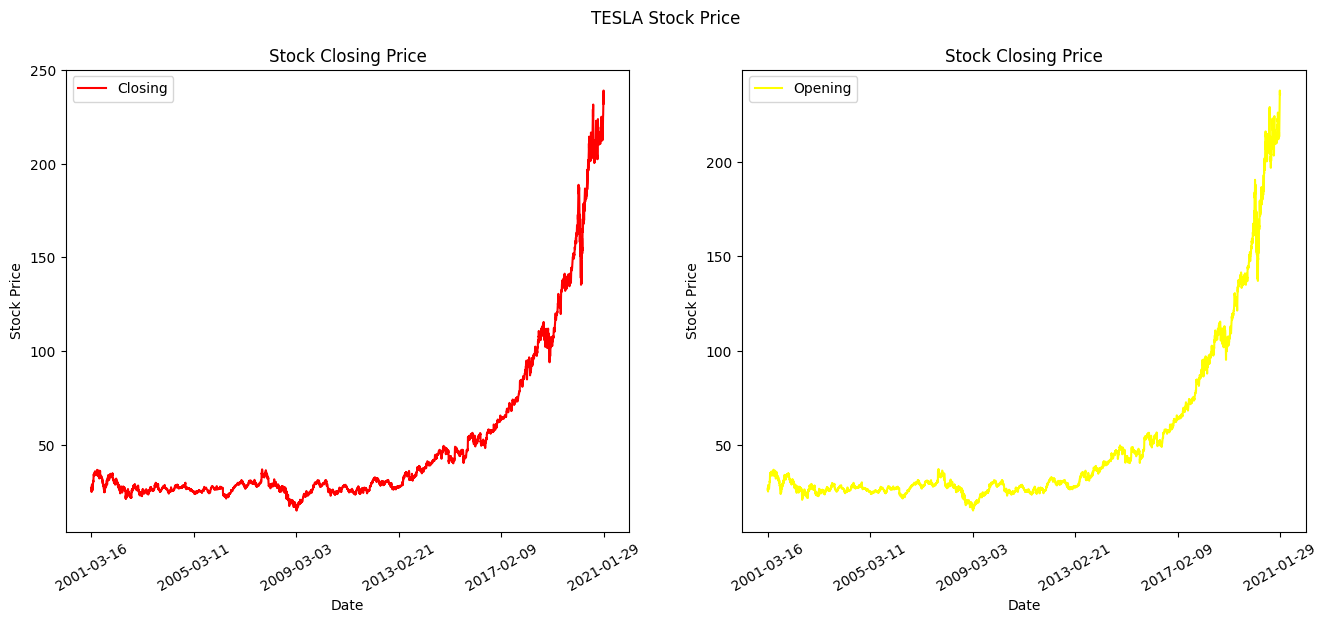

In [40]:
myarr=np.arange(0,5000,1000)
myarr=np.append(myarr,4999)

plt.subplot(1,2,1)
plt.plot(df1['date'],df1['close'],label='Closing',color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price")
plt.xticks(myarr,rotation=30)
plt.rcParams['figure.figsize']=(16,6)
plt.legend(loc='upper left')


plt.subplot(1,2,2)
plt.plot(df1['date'],df['open'],label='Opening',color='yellow')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price")
plt.xticks(myarr,rotation=30)
plt.rcParams['figure.figsize']=(16,6)
plt.legend(loc='upper left')

plt.suptitle("TESLA Stock Price")
plt.show()


In [41]:
df1=df['close']

In [42]:
df1.shape

(5000,)

In [43]:
print(df1.head())

0    27.28125
1    27.15625
2    26.34375
3    25.03125
4    27.00000
Name: close, dtype: float64


In [44]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=np.array(df1)

In [45]:
print(df1.shape)

(5000,)


In [46]:
#it is having 253 rows
print(df1[0],df1[1])

27.28125 27.15625


In [47]:
df1=df1.reshape(-1,1)
df1=scaler.fit_transform(df1)

In [48]:
df1.shape

(5000, 1)

In [49]:
print(df1[0],df1[1])

[0.05421061] [0.05365203]


In [50]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size

In [51]:
print(train_size,test_size)

3750 1250


In [52]:
train_data=df1[0:train_size]
test_data=df1[train_size:]

In [53]:
print(len(train_data),len(test_data))

3750 1250


In [54]:
print(train_data.shape)

(3750, 1)


In [55]:
def seq(data,step):
    x,y=[],[]
    for i in range(0,len(data)-1-step):
        xi=data[i:(i+step),0]
        x.append(xi)
        yi=data[i+step,0]
        y.append(yi)
    return np.array(x),np.array(y)

In [56]:
step=200
x_train, y_train=seq(train_data,step)
x_test, y_test=seq(test_data,step)

In [57]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3549, 200) (3549,)
(1049, 200) (1049,)


In [58]:
r,c=x_train.shape
x_train=x_train.reshape(r,c,1)

In [59]:
r2,c2=x_test.shape
x_test=x_test.reshape(r2,c2,1)

In [60]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(step,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

INIT_LR = 1e-4
epc=20
bs=64
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / epc)
model.compile(loss='mean_squared_error',optimizer='adam')

In [61]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 200, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 200, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 231851 (905.67 KB)
Trainable params: 231851 (905.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [62]:
modelfit=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epc,batch_size=bs,verbose=1)

Epoch 1/20
56/56 [==============================] - 96s 2s/step - loss: 3.9511e-04 - val_loss: 0.0100
Epoch 2/20
56/56 [==============================] - 60s 1s/step - loss: 4.7120e-05 - val_loss: 0.0022
Epoch 3/20
56/56 [==============================] - 62s 1s/step - loss: 3.8300e-05 - val_loss: 0.0034
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 3.4727e-05 - val_loss: 7.5236e-04
Epoch 5/20
56/56 [==============================] - 65s 1s/step - loss: 3.4124e-05 - val_loss: 0.0011
Epoch 6/20
56/56 [==============================] - 68s 1s/step - loss: 3.1691e-05 - val_loss: 5.3876e-04
Epoch 7/20
56/56 [==============================] - 71s 1s/step - loss: 3.2812e-05 - val_loss: 5.1894e-04
Epoch 8/20
56/56 [==============================] - 68s 1s/step - loss: 2.6826e-05 - val_loss: 5.3023e-04
Epoch 9/20
56/56 [==============================] - 68s 1s/step - loss: 2.9736e-05 - val_loss: 5.9679e-04
Epoch 10/20
56/56 [==============================] - 72s 1s/st

In [75]:
model.save("LSTM_model.keras")

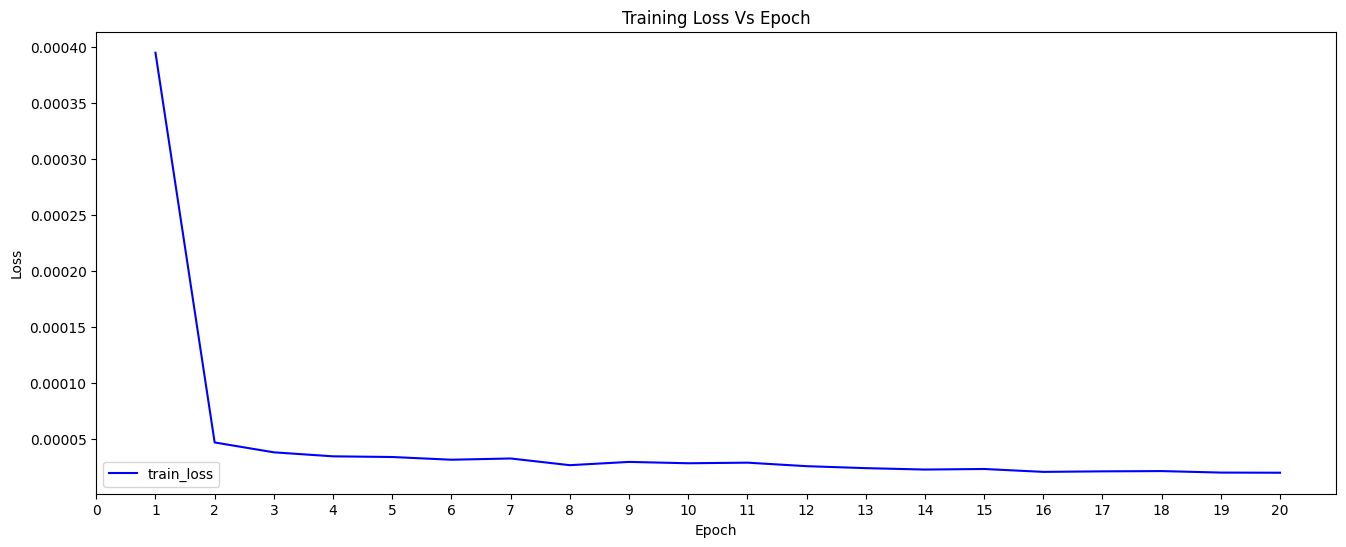

In [76]:
myarr=np.arange(0, 20, 1)
myarr=np.append(myarr,20)

plt.plot(np.arange(1,epc+1), modelfit.history["loss"], label="train_loss", color='blue')
plt.title("Training Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

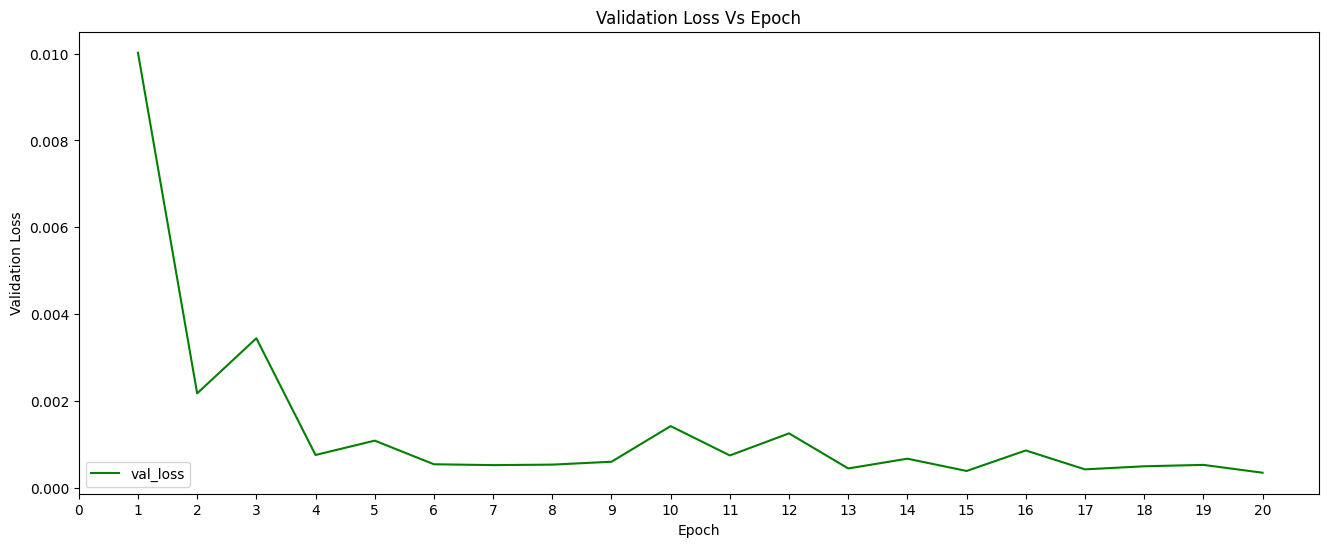

In [77]:
plt.plot(np.arange(1, epc+1), modelfit.history["val_loss"], label="val_loss", color='green')
plt.title("Validation Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()